   # Параметры успешности компьютерной игры  (на основе данных интернет-магазина "Стримчик")

***Описание проекта***

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
    
***Описание данных***

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


***Вывод:***

 - В датасете присутствуют столбцы с количеством продаж в разных регионах, рейтингами, названиями игр и платформ, а также год выпуска игры и ее жанр
 - Нужно поменять тип столбцов year_of_release, user_score, т.к. год выпуска нужно обозначит просто целым числом, а рейтинг обозначаем дробным числом, а не типом object
 - В некоторых столбцах есть пропуски, их обработаем на следующем этапе
 - Нужно проверить данные на дубликаты и аномальные значения

## Предобработка данных

In [5]:
# Приведем названия столбцов к нижнему регистру для удобства

data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Проверяем датасет на дубликаты

data.duplicated().sum()

0

In [7]:
# Изучим значения в каждом столбце с пропусками

display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique()) # есть tbd значения
display(data['year_of_release'].unique())
data['rating'].unique() 

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

 - Tbd расшифровывается "To Be Determined", то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Значит можем эти значения заменить на nan
 - В столбце rating у каждой игры обозначена категория:
   - ***EC:*** Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует
   - ***E:*** Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика
   - ***E10+:*** Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей
   - ***K-A:*** Игры, содержание которых подходит любой аудитории (переименован в Е после 1998 г.)
   - ***T:*** Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия
   - ***M:*** Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков
   - ***AO:*** Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности
   - ***RP:*** Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB

In [8]:
# Меняем категорию К-А на категорию Е, раз это одно и то же, проверяем

data['rating'] = data['rating'].replace("K-A", "E")
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
# Меняем типы столбцов там, где это нужно

data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year
data['user_score'] = data['user_score'].replace("tbd", np.NaN) 
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


***Обработка пропусков***

In [10]:
# Посчитаем пропуски отдельно для наглядности

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
# В столбце name всего 2 пропуска, это меньше 1% данных и заполнить эти пропуски мы не можем, удалим их
# в этих же двух строках пропуски в столбце genre

display(data.query('name.isna()'))
data = data.dropna(subset=['name'])
data.isna().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [12]:
# Заполним пропуски в year_of_release на основании платформы игры 

for t in data['platform'].unique():
    data.loc[(data['platform'] == t) & (data['year_of_release'].isna()), 'year_of_release'] = \
    data.loc[(data['platform'] == t), 'year_of_release'].median()
    

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [13]:
# Считаем суммарные продажи во всех регионах

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


***Вывод:***

 - На этом этапе были подробнее изучены столбцы с пропусками
   - Столбцы с оценками критиков и пользователей содержат числа с плавающей точкой, соответственно они были приведены к типу float
   - В столбце с оценками пользователей были найдены объекты "tbd", которые теперь заменены на 'nan'
   - Заполнить пропуски в этих двух столбцах не получится (некорректно заполнять оценки или будущие оценки по средним показателям, т.к. на их формирование влияет много разных факторов), оставим их
   - Столбец с годом выпуска был приведен к типу datetime и выделен год. Пропуски в нем заполнены на основании платформы (медианное значение по годам на платформе)
   - Два пропуска в name и genre просто удалены
 - Описаны возрастные категории игр, содержащиеся в столбце rating
 - Данные проверены на дубликаты
 - Названия столбцов приведены к нижнему регистру
 - Создан новый столбец с суммарными продажами игр во всех регионах

## Исследовательский анализ данных

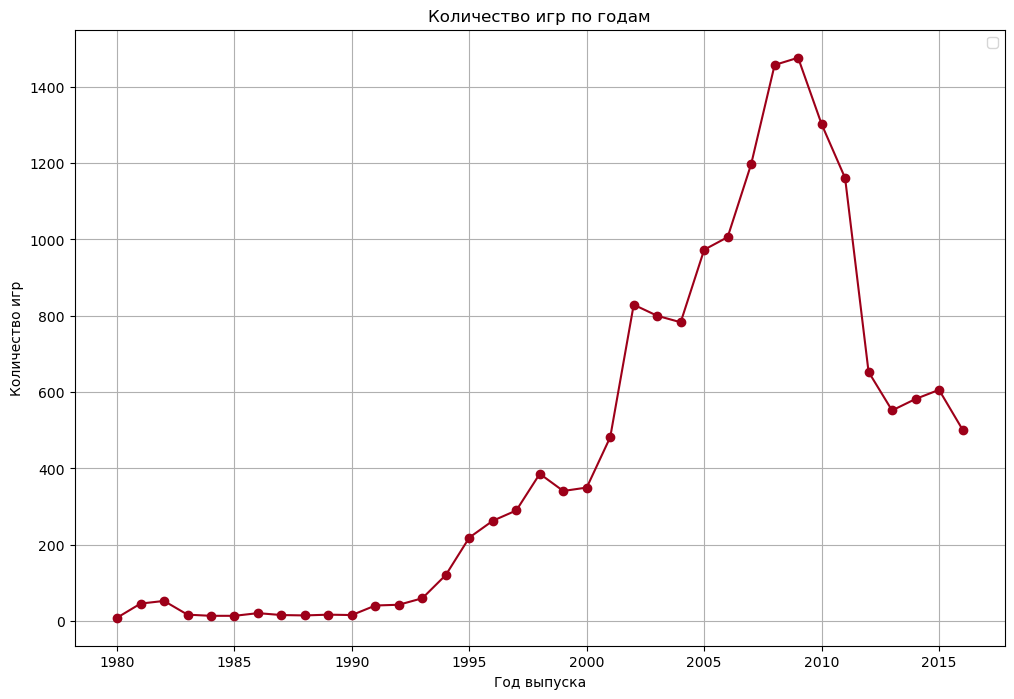

In [14]:
# Посмотрим, сколько игр было выпущено в разные годы

name_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
name_year.plot(grid=True, figsize=(12,8), style='o-', color='#9D0019');
plt.title('Количество игр по годам');
plt.xlabel('Год выпуска');
plt.ylabel('Количество игр');
plt.legend('');

 - На графике видно, что до 1993 года игры выпускались в небольшом кол-ве или не выпускались вообще, данные до 1993 года не важны для исследования
 - С 1993 начинается плавный рост количества выпускаемых игр 
 - Самое большое количество игр выпускалось в период с 2000 до 2016 года, в 2008 году - пик, после которого начинается резкий спад

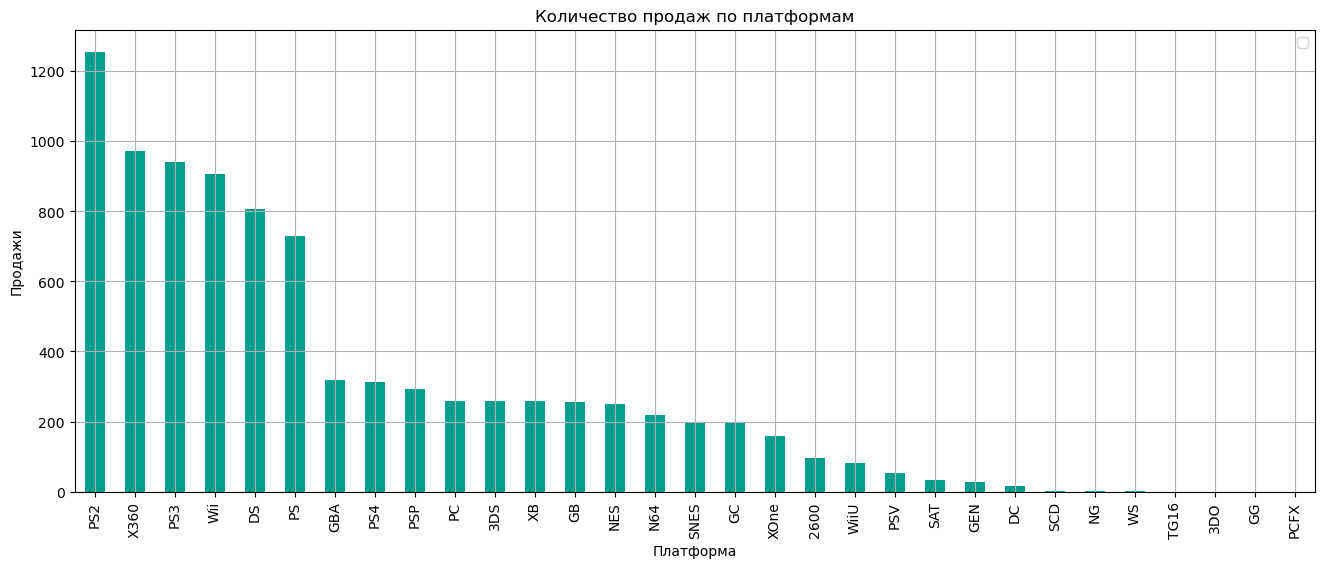

In [15]:
# Продажи по платформам и годам

platform_sales = data.pivot_table(index='platform', values='total_sales', \
                                  aggfunc='sum').sort_values(by='total_sales', ascending=False)

platform_sales.plot(grid=True, figsize=(16,6), kind='bar', color='#009E8E');
plt.title('Количество продаж по платформам');
plt.xlabel('Платформа');
plt.ylabel('Продажи');
plt.legend('');

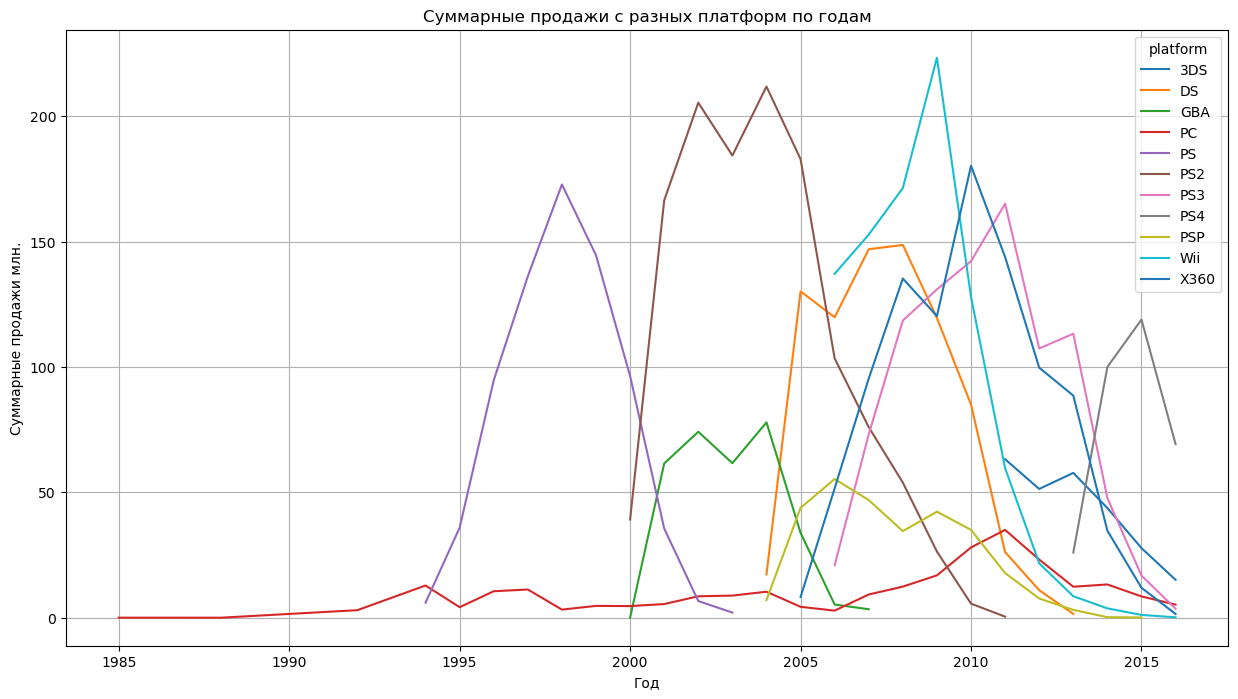

In [16]:
# Возьмем 11 первых платформ с продажами более 200 млн.

top_platforms = platform_sales.head(11)
top_sales_year = (data
                 .query('platform in @top_platforms.index')
                 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                 )
top_sales_year.plot.line(grid=True, figsize=(15, 8), legend=True);
plt.title('Суммарные продажи с разных платформ по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи млн.');

 - PC может наращивать мощности через замену комплектующих в любой период, поэтому график более или менее плоский на протяжении всего времени
 - Другие платформы создают новые версии, чтобы запускать более современные игры, поэтому на графике видно, что в среднем платформа "живет" примерно 10 лет

В качестве актуального периода возьмем данные с 2011 года, т.к. в этом году начинали продаваться либо имели пик продаж существующие до 2016 года платформы

platform,3DS,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,,
2011.0,63.20,26.18,NaN,35.03,NaN,0.45,165.09,NaN,17.82,59.65,143.84
2012.0,51.36,11.01,NaN,23.22,NaN,NaN,107.36,NaN,7.69,21.71,99.74
2013.0,57.76,1.54,NaN,12.38,NaN,NaN,113.25,25.99,3.14,8.59,88.58
2014.0,43.76,NaN,NaN,13.28,NaN,NaN,47.76,100.00,0.24,3.75,34.74
2015.0,27.78,NaN,NaN,8.52,NaN,NaN,16.82,118.90,0.12,1.14,11.96
2016.0,15.14,NaN,NaN,5.25,NaN,NaN,3.60,69.25,NaN,0.18,1.52


platform,3DS,DS,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,
2011.0,63.20,26.18,165.09,NaN,17.82,59.65,143.84
2012.0,51.36,11.01,107.36,NaN,7.69,21.71,99.74
2013.0,57.76,1.54,113.25,25.99,3.14,8.59,88.58
2014.0,43.76,NaN,47.76,100.00,0.24,3.75,34.74
2015.0,27.78,NaN,16.82,118.90,0.12,1.14,11.96
2016.0,15.14,NaN,3.60,69.25,NaN,0.18,1.52


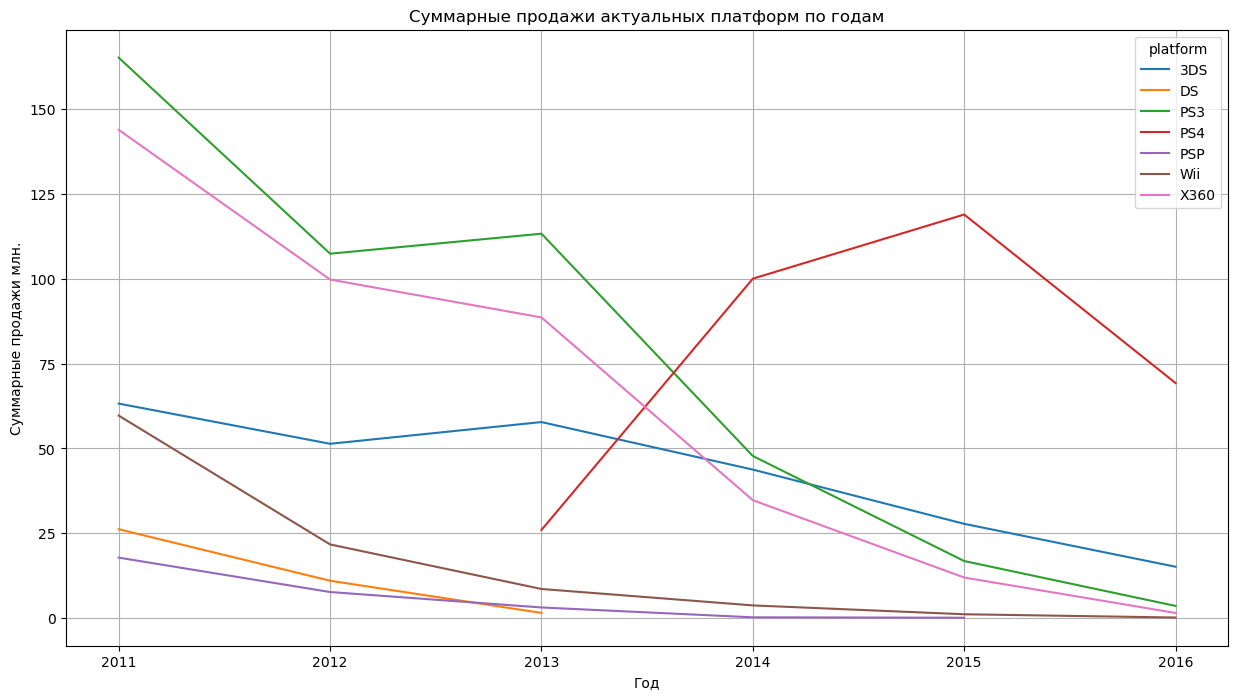

In [17]:
top_sales_relevant = top_sales_year.query('year_of_release >= 2011 & year_of_release <= 2016')
display(top_sales_relevant)

# Уберем непоказательные столбцы (платформы)

top_sales_relevant = top_sales_relevant.drop(axis=1, labels=['GBA', 'PC', 'PS', 'PS2'])
display(top_sales_relevant)

# Строим график

top_sales_relevant.plot.line(grid=True, figsize=(15, 8), legend=True);
plt.title('Суммарные продажи актуальных платформ по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи млн.');

 - Судя по таблицам выше и графику, самые потенциально прибыльные платформы это 3DS, PS (3 и 4) и X360
 - У всех платформ продажи падают, возможно потому, что к 2016 году пик продаж уже прошел и близится к концу "срок жизни" платформы

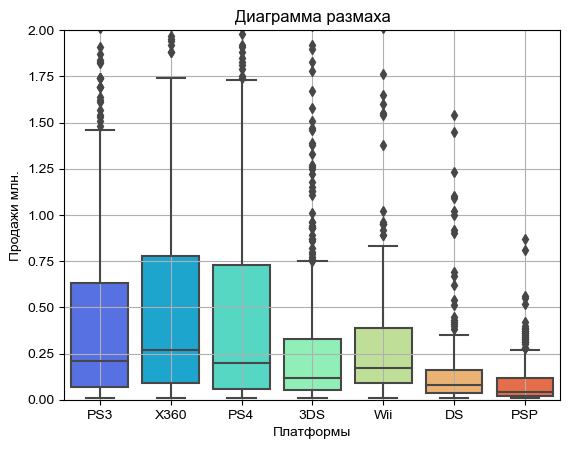

In [18]:
# Построим диаграмму размаха для прибыльных платформ

data_relevant = data.query('year_of_release >= 2011 & year_of_release <= 2016')
data_relevant_boxplot = data_relevant.query('platform == ["3DS", "DS", "PS3", "PS4", "PSP", "Wii", "X360"]')
sns.boxplot(data=data_relevant_boxplot, palette='rainbow', x='platform', y='total_sales');
sns.set(rc={'figure.figsize':(15,8)});
plt.title('Диаграмма размаха');
plt.xlabel('Платформы');
plt.ylabel('Продажи млн.');
plt.ylim(0,2);
plt.grid(True);

 - По графику видно, что примерно одинаково большой размер продаж у платформы PS4 и Х360, далее за ними идут PS3, XOne и WiiU
 - Однако есть много выбросов:
    - самое большое количество выбросов у PS3, PS4, Х360 и 3DS
    - самая продаваемая игра была выпущена на платформе PS3
    - хоть в целом продажи у 3DS невысокие по сравнению с другими платформами, на ней выпускают много продаваемых игр

***Корреляция "отзывы-продажи"***

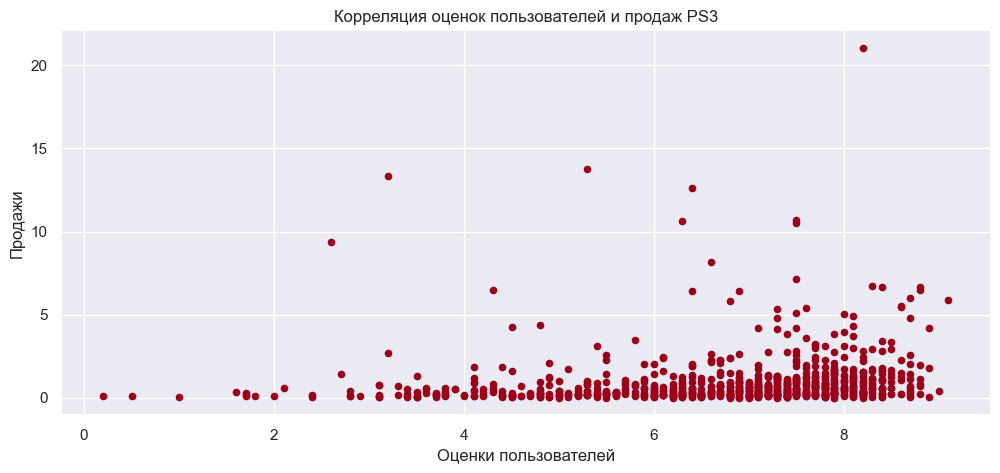

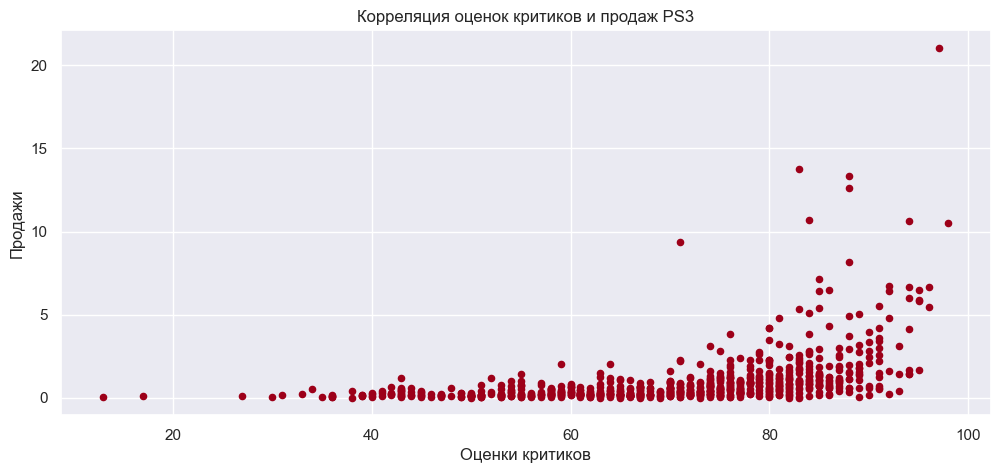

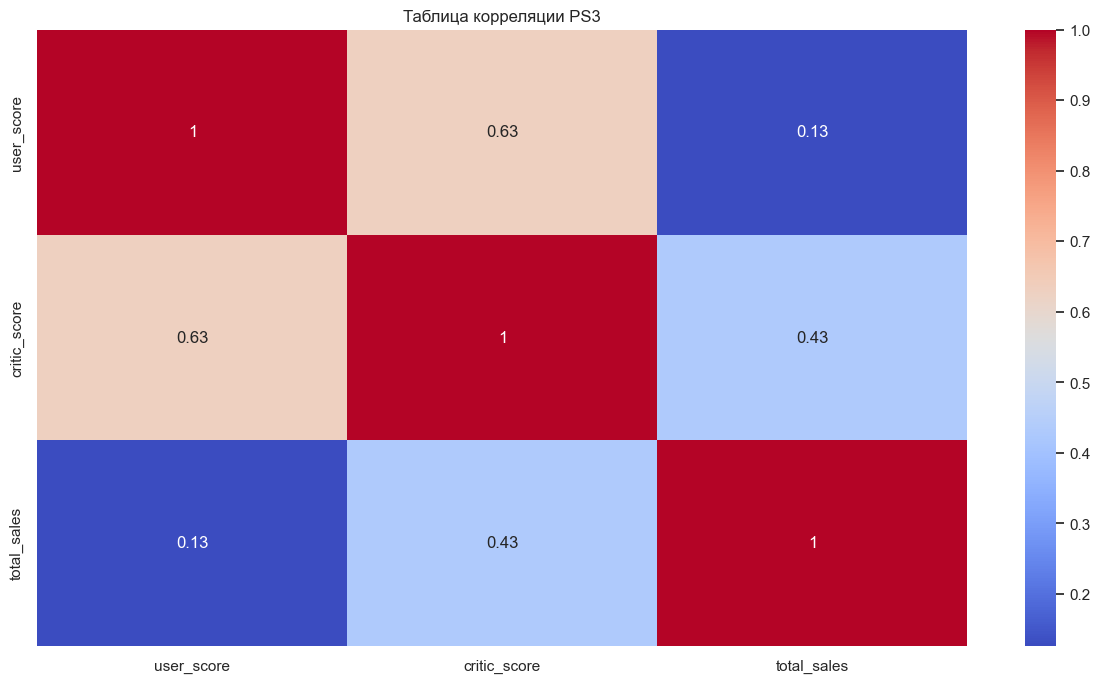

In [19]:
# Сначала для удобства лучше определить функцию, которая будет выводить графики и таблицу корреляции для нужной платформы

def corr_graph(platform_name):
    platform = data[data['platform'] == platform_name]
    columns = ['user_score', 'critic_score', 'total_sales']
    platform.plot(grid=True, x='user_score', y='total_sales', kind='scatter', figsize=(12, 5), color='#9D0019')
    plt.title(f'Корреляция оценок пользователей и продаж {platform_name}')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    
    platform.plot(grid=True, x='critic_score', y='total_sales', kind='scatter', figsize=(12, 5), color='#9D0019')
    plt.title(f'Корреляция оценок критиков и продаж {platform_name}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.show()
    
    sns.heatmap(platform[columns].corr(),cmap='coolwarm', annot=True)
    plt.title(f'Таблица корреляции {platform_name}')

# Взаимосвязь "отзывы критиков - продажи" на примере PS3
# Взаимосвязь "отзывы пользователей - продажи" на примере PS3

corr_graph('PS3')

 - На примере платформы PS3 мы видим, что наблюдается небольшая корреляция между оценками критиков и продажами - 0.43, значит на продажи влияют больше другие факторы
 - Корреляция между оценками пользователей и продажами довольно слабая - 0.13
 - Зато мы наблюдаем связь между оценками пользователей и критиков

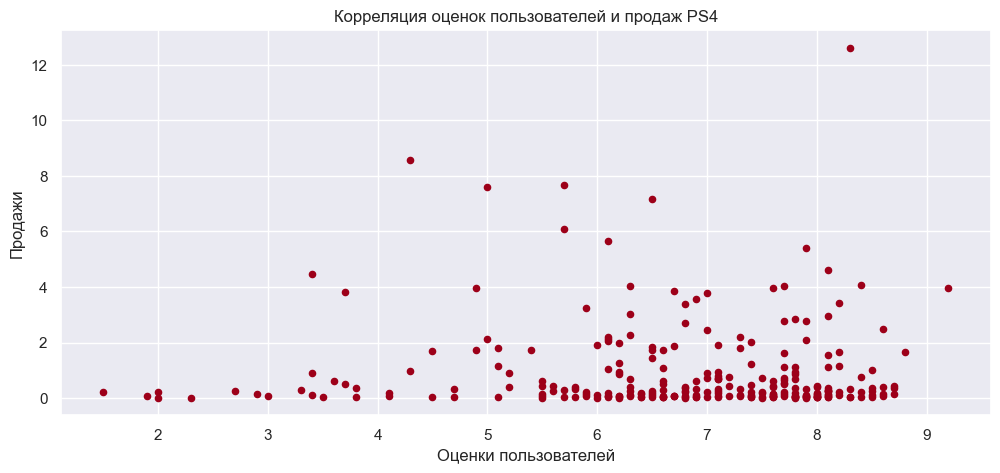

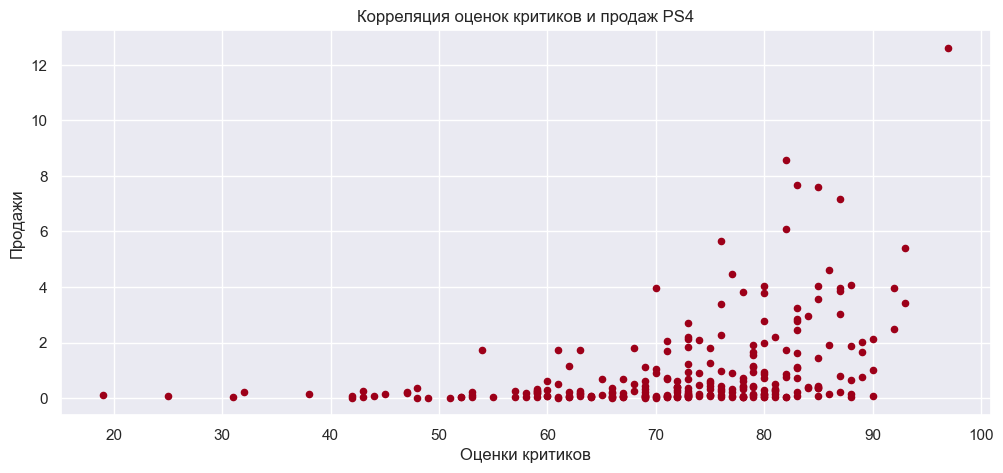

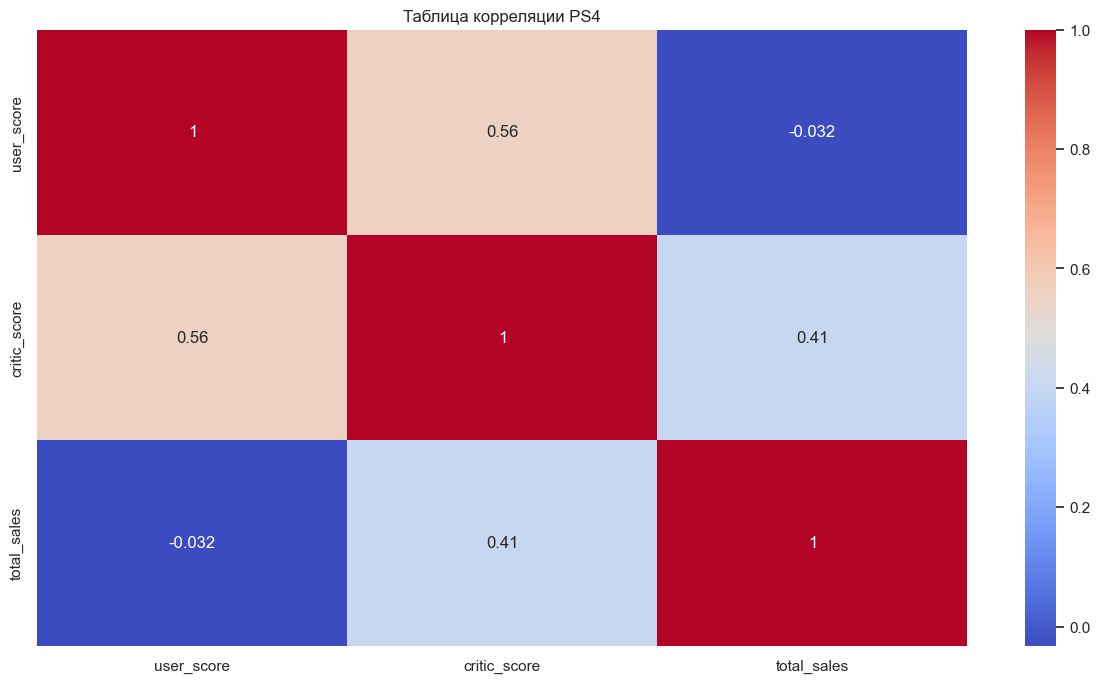

In [20]:
# Проверим корреляцию на примере других платформ

corr_graph('PS4')

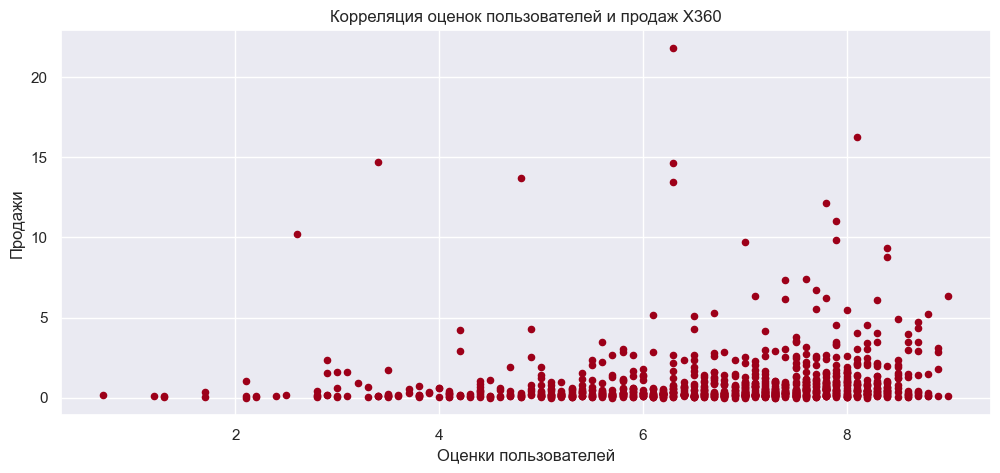

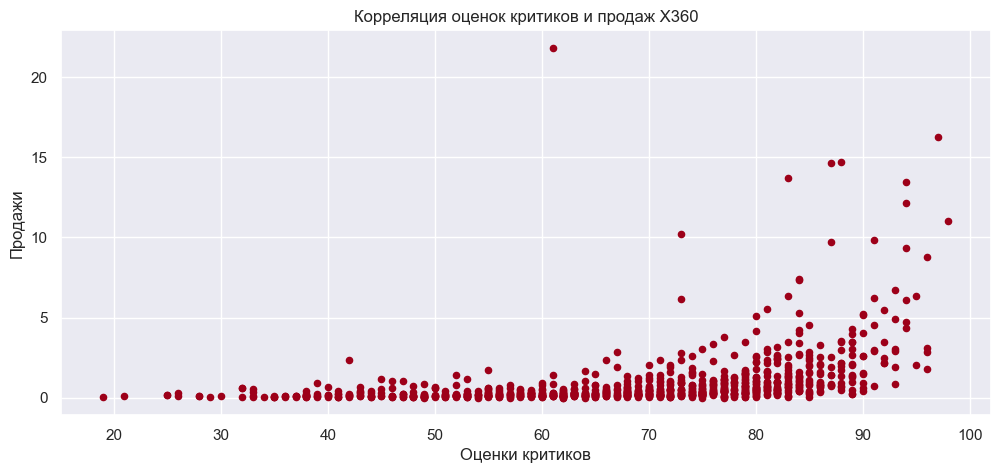

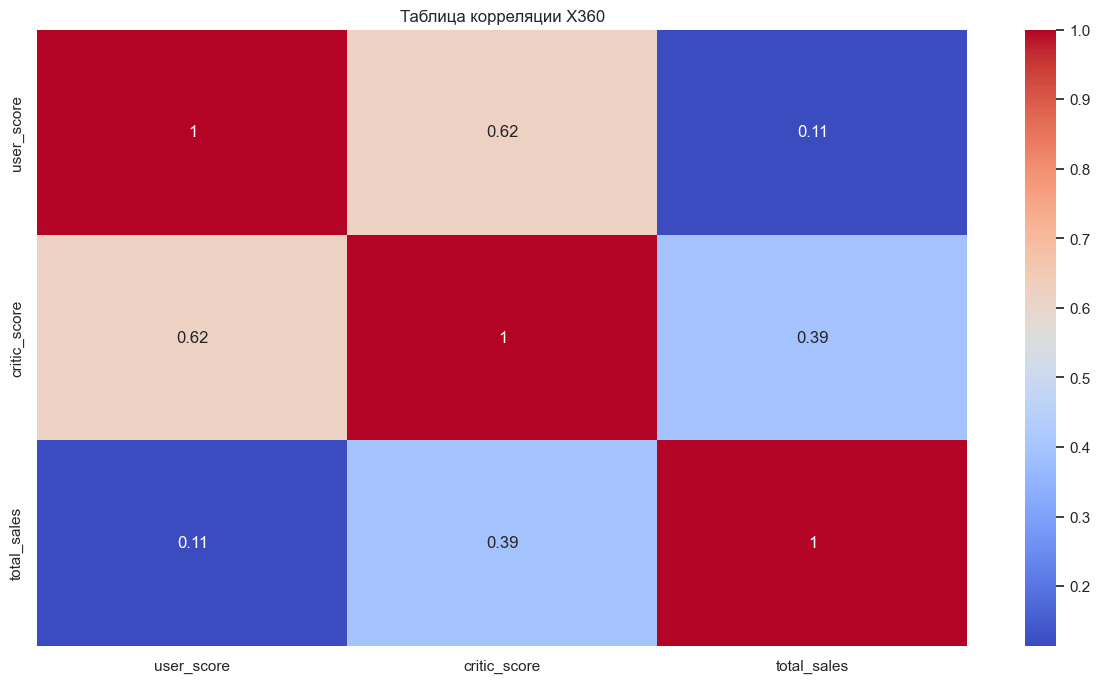

In [21]:
corr_graph('X360')

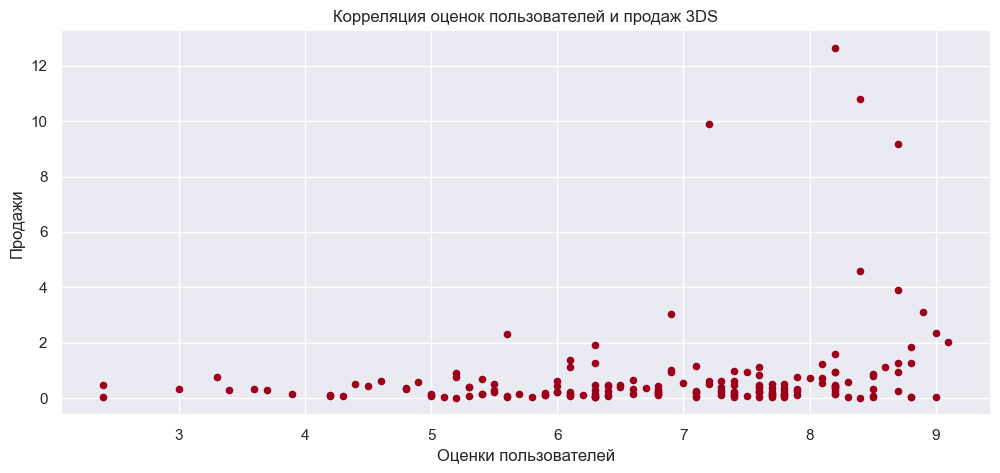

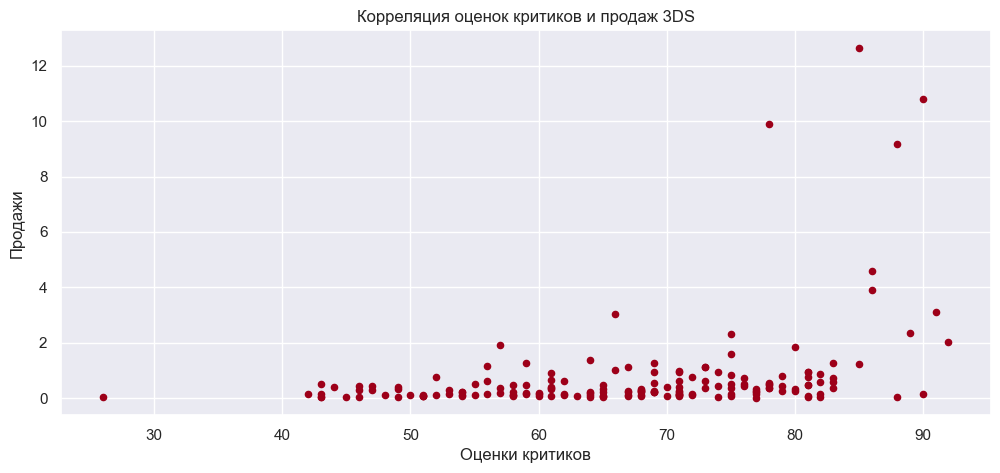

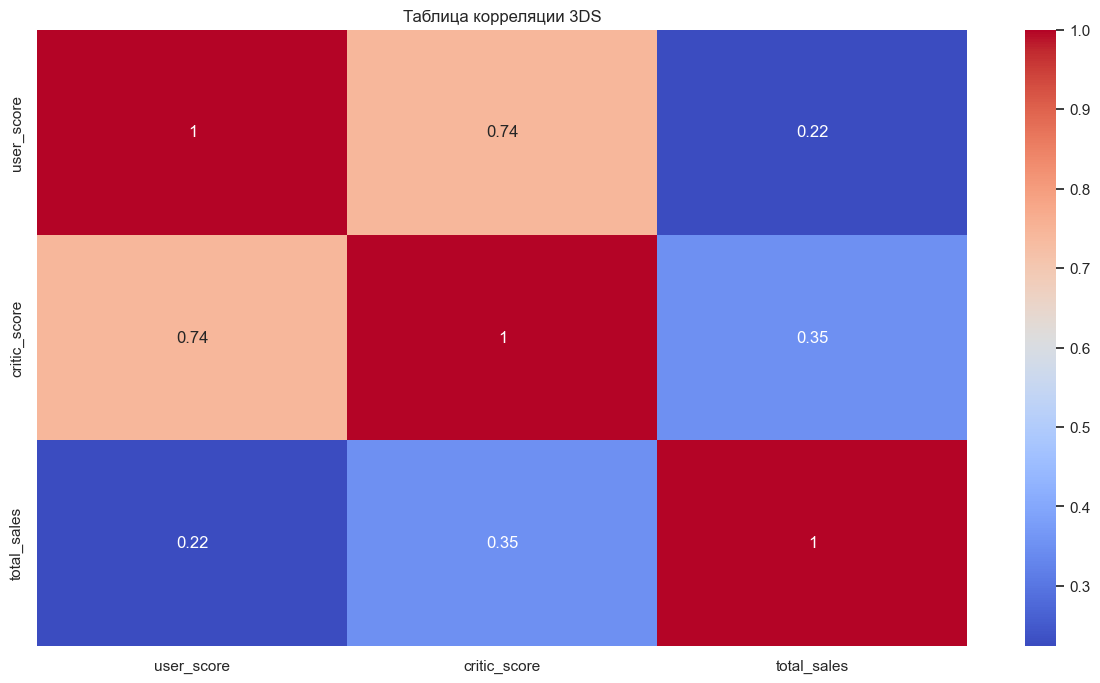

In [22]:
corr_graph('3DS')

 - У всех наблюдаемых платформ практически отсутствует (слабая корреляция) связь между оценками пользователей и продажами, иногда есть небольшая корреляция в паре оценки критиков - продажи

***Распределение игр по жанрам***

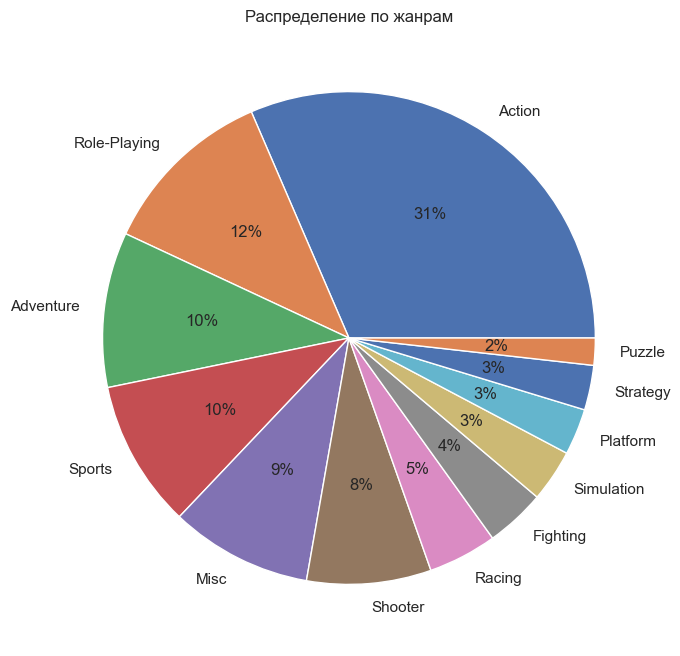

In [23]:
# Сначала посмотрим распределение жанров между собой 

data_relevant = data.query('year_of_release >= 2011 & year_of_release <= 2016')

data_relevant['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False,\
                                          title='Распределение по жанрам', autopct='%1.0f%%',\
                                          label='');

,genre,total_sales
0,Shooter,0.41
1,Sports,0.20
2,Platform,0.19
3,Fighting,0.18
4,Racing,0.16
5,Role-Playing,0.15
6,Action,0.13
7,Misc,0.13
8,Simulation,0.11
9,Strategy,0.08


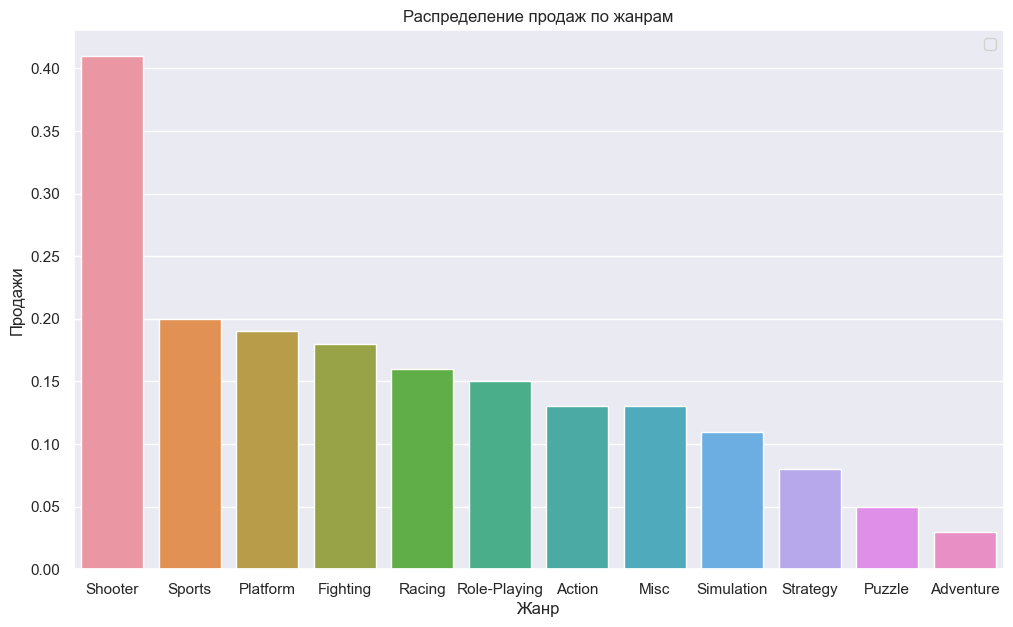

In [24]:
# Рассмотрим медианные значения по продажам жанров

genres_sales = (
    data_relevant.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
display(genres_sales)

plt.figure(figsize=(12,7))
sns.barplot(data=genres_sales, x='genre', y='total_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр');
plt.ylabel('Продажи');
plt.legend('');

 - По количеству выпускаемых игр лидируют жанры:
   - action (31%)
   - role-playing (12%)
   - adventure (10%)
   - sports (10%)
   - misc (9%)
   - shooter (8%)
 - По количеству продаж лидируют жанры:
   - shooter
   - sports
   - platform
   - fighting
 - Можно сделать вывод, что больше всего выпускают игры в жанре action
 - Самые продаваемые - это sports, shooter, platform и fighting. Несмотря на то, что игр в жанре shooter выпускается меньше, продажи у них в среднем самые высокие
 - Жанрами с низкими продажами относительно других можно назвать puzzle и adventure

***Вывод:***

 - Самое большое количество игр выпускалось в период с 2000 до 2016 года, в 2008 году - пик, после которого начинается резкий спад
 - в среднем платформа "живет" примерно 10 лет
 - Самые потенциально прибыльные платформы (и которые еще "живы") это PS (3 и 4) и X360
 - Самое большое число продаж у платформы PS4
 - Наблюдается небольшая корреляция между оценками критиков и продажами у некоторых платформ
 - Корреляция между оценками пользователей и продажами довольно слабая
 - Самые продаваемые - это sports, shooter, platform и fighting. Несмотря на то, что игр в жанре shooter выпускается меньше, продажи у них в среднем самые высокие
 - Жанрами с низкими продажами относительно других можно назвать puzzle и adventure

## Портрет пользователя каждого региона

### Северная Америка

***ТОП-5 платформ***

In [25]:
# Делаем сводную таблицу с продажами по платформам и долей этих продаж

na_best_platform = (
    data_relevant.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)

na_best_platform['na_ratio'] = round(na_best_platform['na_sales']/sum(na_best_platform['na_sales']), 2)
display(na_best_platform.head())

,platform,na_sales,na_ratio
0,X360,226.80,0.27
1,PS3,171.62,0.21
2,PS4,108.74,0.13
3,XOne,93.12,0.11
4,3DS,83.49,0.10


***ТОП-5 жанров***

In [26]:
# Сводная по жанрам Северной Америки

na_top_genre = (
    data_relevant
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)

na_top_genre['na_ratio'] = round(na_top_genre['na_sales'] / sum(na_top_genre['na_sales']), 2)
display(na_top_genre.head())

,genre,na_sales,na_ratio
0,Action,232.44,0.28
1,Shooter,194.64,0.23
2,Sports,108.86,0.13
3,Role-Playing,83.89,0.10
4,Misc,70.93,0.09


***Влияние рейтинга ESRB на продажи***

In [27]:
# Сводная по рейтингу и продажам

na_esrb_sales = (
    data_relevant
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)

na_esrb_sales['na_ratio'] = round(na_esrb_sales['na_sales'] / sum(na_esrb_sales['na_sales']), 2)
display(na_esrb_sales)

,rating,na_sales,na_ratio
0,M,309.33,0.44
1,E,170.58,0.24
2,E10+,118.34,0.17
3,T,111.33,0.16
4,EC,0.42,0.00
5,RP,0.00,0.00


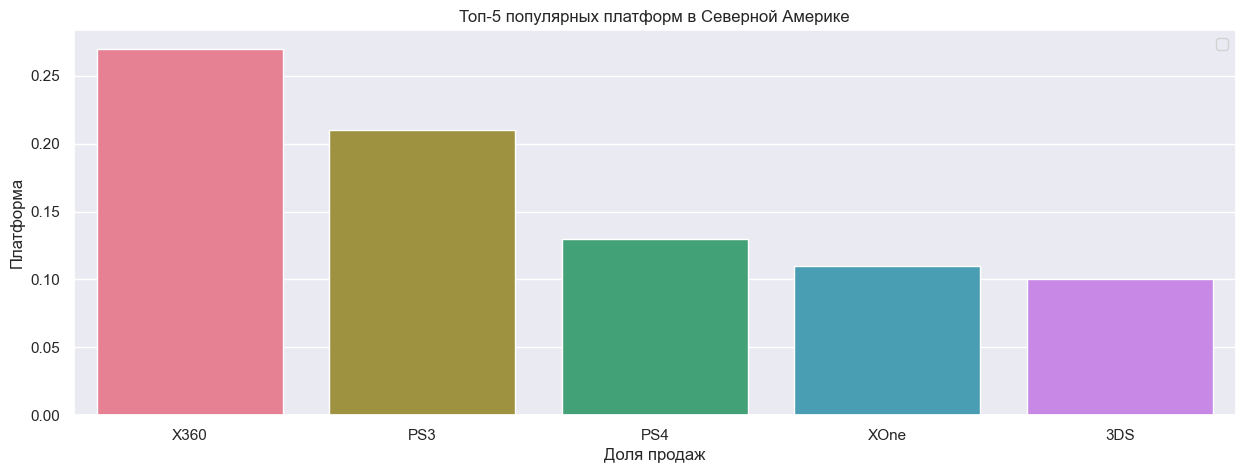

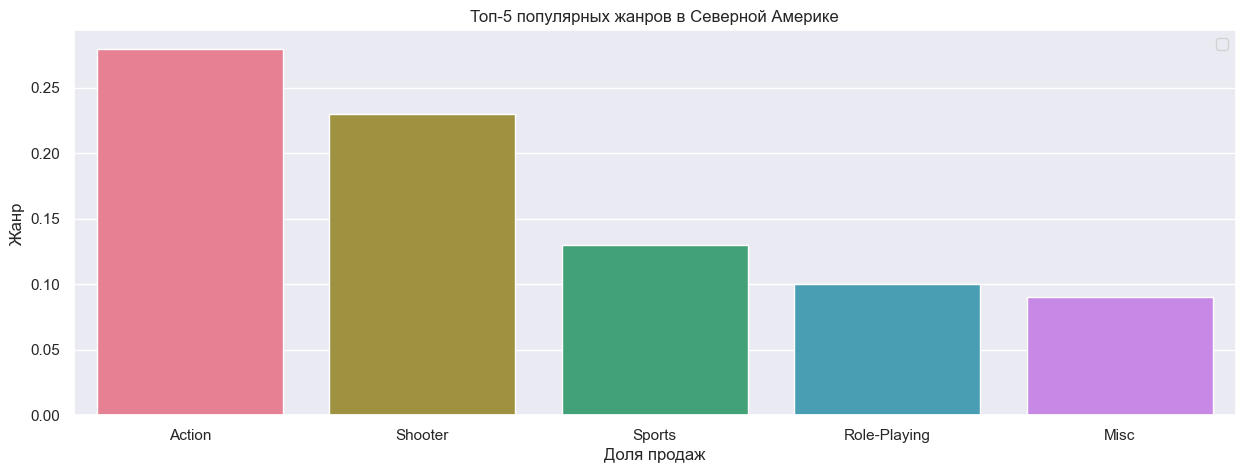

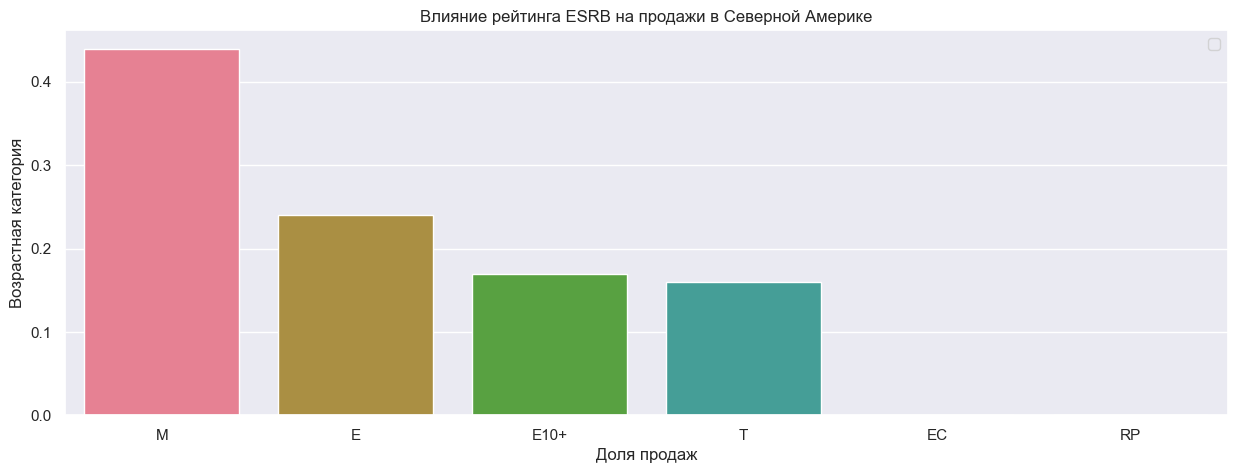

In [28]:
# Строим графики

plt.figure(figsize=(15,5))
sns.barplot(data=na_best_platform.head(), y='na_ratio', x='platform', palette='husl');
plt.title('Топ-5 популярных платформ в Северной Америке')
plt.xlabel('Доля продаж');
plt.ylabel('Платформа');
plt.legend('');


plt.figure(figsize=(15,5))
sns.barplot(data=na_top_genre.head(), y='na_ratio', x='genre', palette='husl');
plt.title('Топ-5 популярных жанров в Северной Америке')
plt.xlabel('Доля продаж');
plt.ylabel('Жанр');
plt.legend('');


plt.figure(figsize=(15,5))
sns.barplot(data=na_esrb_sales, y='na_ratio', x='rating', palette='husl');
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Доля продаж');
plt.ylabel('Возрастная категория');
plt.legend('');

 - На графиках можно увидеть портрет типичного пользователя Северной Америки:
   - взрослый человек старше 17 лет
   - использует платформы Х360 или PS3
   - играет в игры жанров action или shooter 

### Европа

***ТОП-5 платформ***

In [29]:
# Делаем сводную таблицу с продажами по платформам и долей этих продаж

eu_best_platform = (
    data_relevant.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

eu_best_platform['eu_ratio'] = round(eu_best_platform['eu_sales']/sum(eu_best_platform['eu_sales']), 2)
display(eu_best_platform.head())

,platform,eu_sales,eu_ratio
0,PS3,166.18,0.25
1,PS4,141.09,0.21
2,X360,117.10,0.17
3,3DS,61.48,0.09
4,PC,56.70,0.08


***ТОП-5 жанров***

In [30]:
# Сводная по жанрам Европы

eu_top_genre = (
    data_relevant
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

eu_top_genre['eu_ratio'] = round(eu_top_genre['eu_sales'] / sum(eu_top_genre['eu_sales']), 2)
display(eu_top_genre.head())

,genre,eu_sales,eu_ratio
0,Action,200.57,0.30
1,Shooter,148.08,0.22
2,Sports,88.83,0.13
3,Role-Playing,62.35,0.09
4,Racing,41.06,0.06


***Влияние рейтинга ESRB на продажи***

In [31]:
# Сводная по рейтингу и продажам

eu_esrb_sales = (
    data_relevant
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

eu_esrb_sales['eu_ratio'] = round(eu_esrb_sales['eu_sales'] / sum(eu_esrb_sales['eu_sales']), 2)
display(eu_esrb_sales)

,rating,eu_sales,eu_ratio
0,M,251.01,0.45
1,E,141.94,0.26
2,T,84.13,0.15
3,E10+,79.08,0.14
4,RP,0.03,0.00
5,EC,0.00,0.00


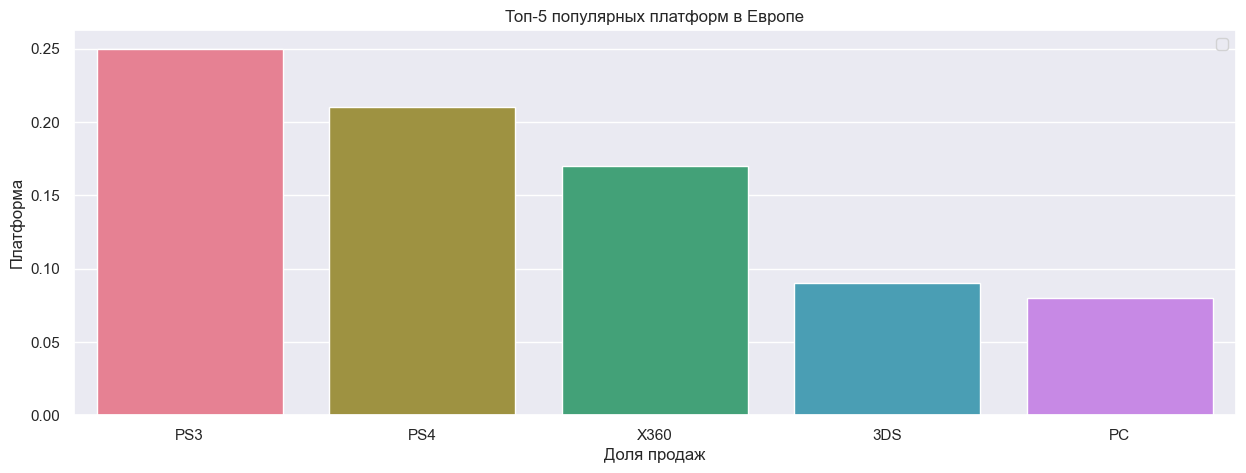

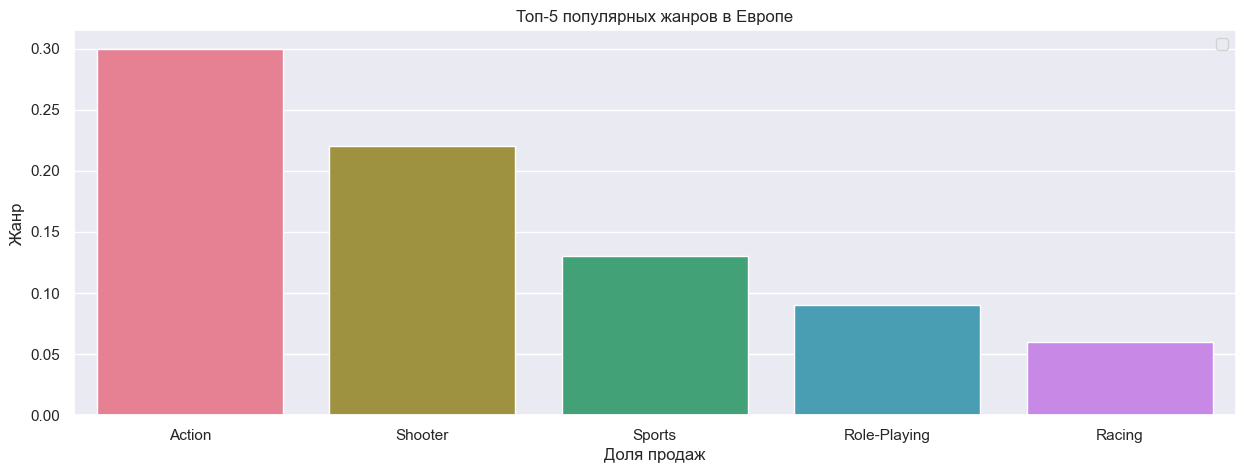

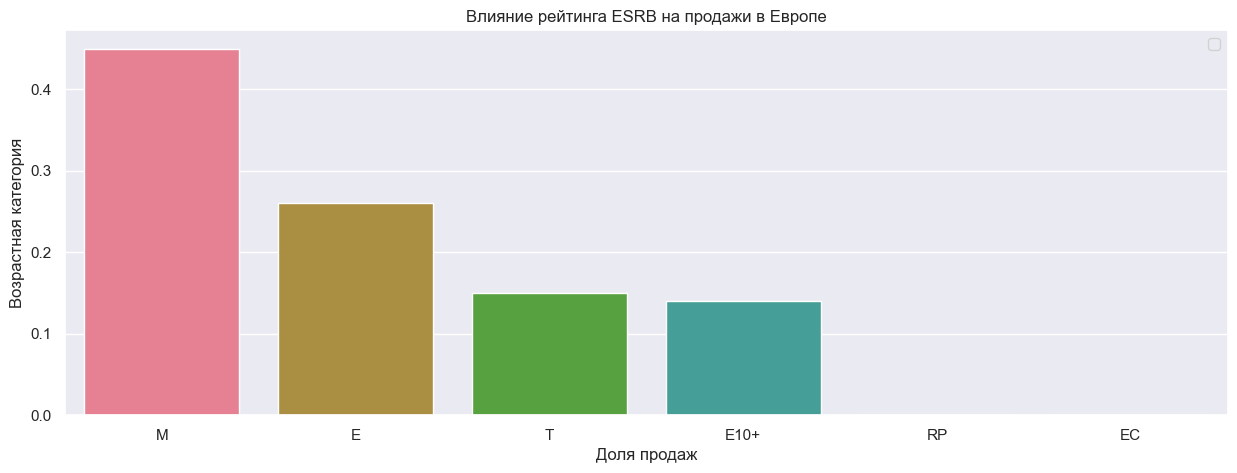

In [32]:
# Строим графики

plt.figure(figsize=(15,5))
sns.barplot(data=eu_best_platform.head(), y='eu_ratio', x='platform', palette='husl');
plt.title('Топ-5 популярных платформ в Европе')
plt.xlabel('Доля продаж');
plt.ylabel('Платформа');
plt.legend('');


plt.figure(figsize=(15,5))
sns.barplot(data=eu_top_genre.head(), y='eu_ratio', x='genre', palette='husl');
plt.title('Топ-5 популярных жанров в Европе')
plt.xlabel('Доля продаж');
plt.ylabel('Жанр');
plt.legend('');


plt.figure(figsize=(15,5))
sns.barplot(data=eu_esrb_sales, y='eu_ratio', x='rating', palette='husl');
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Доля продаж');
plt.ylabel('Возрастная категория');
plt.legend('');

 - На графиках можно увидеть портрет типичного пользователя Европы:
   - взрослый человек старше 17 лет
   - использует платформы PS3 и PS4
   - играет в игры жанров action или shooter

### Япония

***ТОП-5 платформ***

In [33]:
# Делаем сводную таблицу с продажами по платформам и долей этих продаж

jp_best_platform = (
    data_relevant.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

jp_best_platform['jp_ratio'] = round(jp_best_platform['jp_sales']/sum(jp_best_platform['jp_sales']), 2)
display(jp_best_platform.head())

,platform,jp_sales,jp_ratio
0,3DS,100.67,0.41
1,PS3,50.17,0.20
2,PSP,24.04,0.10
3,PSV,21.91,0.09
4,PS4,15.96,0.06


***ТОП-5 жанров***

In [34]:
# Сводная по жанрам Японии

jp_top_genre = (
    data_relevant
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

jp_top_genre['jp_ratio'] = round(jp_top_genre['jp_sales'] / sum(jp_top_genre['jp_sales']), 2)
display(jp_top_genre.head())

,genre,jp_sales,jp_ratio
0,Role-Playing,80.03,0.32
1,Action,64.26,0.26
2,Misc,17.60,0.07
3,Fighting,12.38,0.05
4,Platform,12.13,0.05


***Влияние рейтинга ESRB на продажи***

In [35]:
# Сводная по рейтингу и продажам

jp_esrb_sales = (
    data_relevant
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

jp_esrb_sales['jp_ratio'] = round(jp_esrb_sales['jp_sales'] / sum(jp_esrb_sales['jp_sales']), 2)
display(jp_esrb_sales)

,rating,jp_sales,jp_ratio
0,E,36.68,0.34
1,T,33.50,0.31
2,M,26.79,0.25
3,E10+,11.23,0.10
4,EC,0.00,0.00
5,RP,0.00,0.00


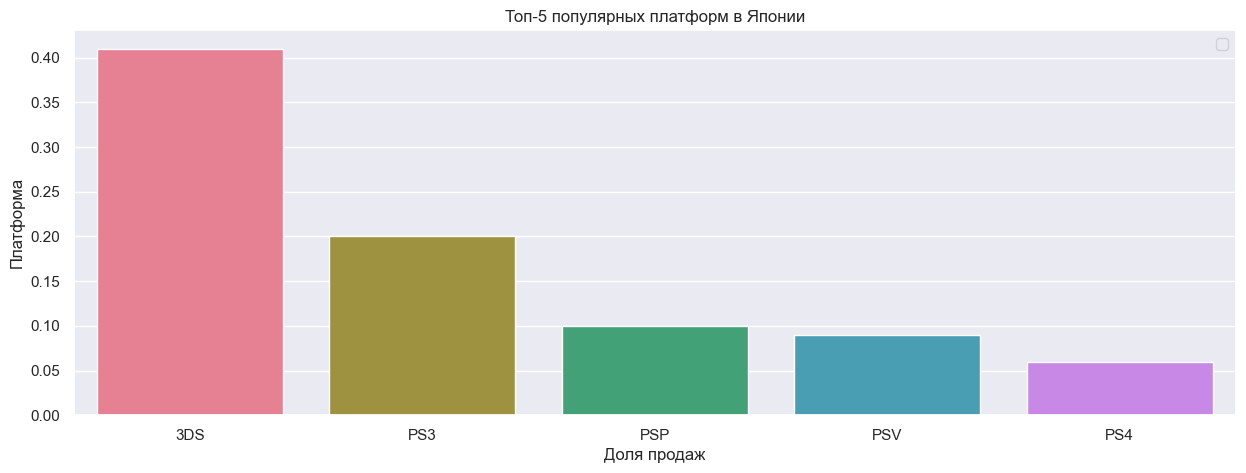

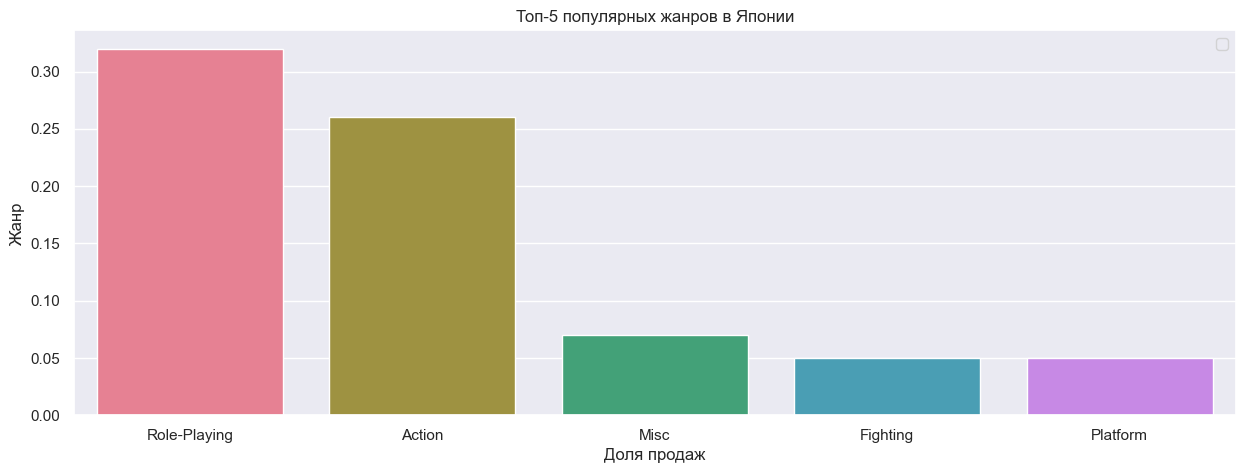

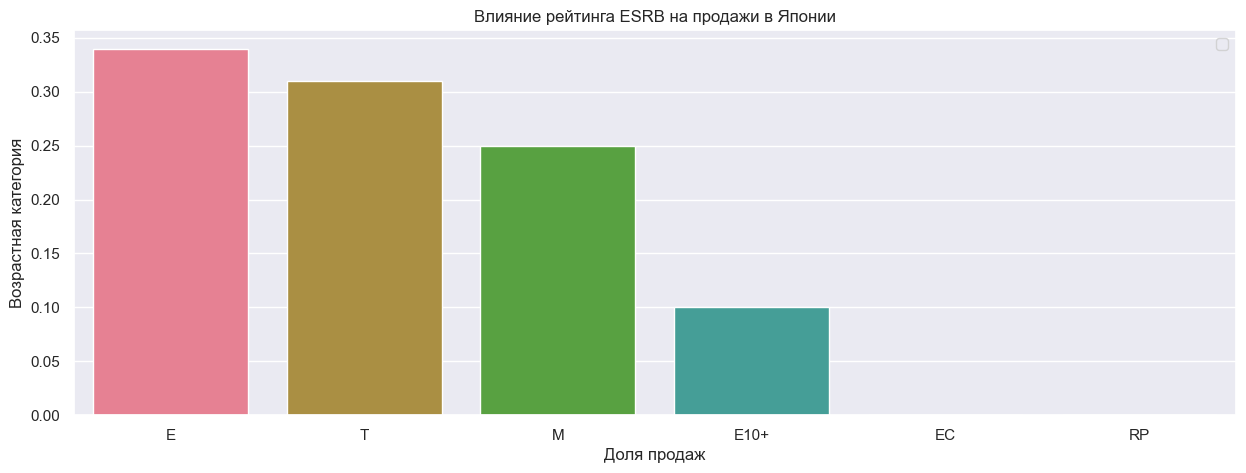

In [36]:
# Строим графики

plt.figure(figsize=(15,5))
sns.barplot(data=jp_best_platform.head(), y='jp_ratio', x='platform', palette='husl');
plt.title('Топ-5 популярных платформ в Японии')
plt.xlabel('Доля продаж');
plt.ylabel('Платформа');
plt.legend('');


plt.figure(figsize=(15,5))
sns.barplot(data=jp_top_genre.head(), y='jp_ratio', x='genre', palette='husl');
plt.title('Топ-5 популярных жанров в Японии')
plt.xlabel('Доля продаж');
plt.ylabel('Жанр');
plt.legend('');


plt.figure(figsize=(15,5))
sns.barplot(data=jp_esrb_sales, y='jp_ratio', x='rating', palette='husl');
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Доля продаж');
plt.ylabel('Возрастная категория');
plt.legend('');

 - На графиках можно увидеть портрет типичного пользователя Японии:
   - чаще всего подросток, но возраст может быть любой
   - использует платформу 3DS
   - играет в игры жанров role-playing или action

***Итог:***

 - Можно предположить, что в Северной Америке и Европе рейтинг ESRB влияет на продажи 
 - Взаимосвязь рейтинга и продаж в этих странах схожа: 44% в СА и 45% в Европе - взрослая аудитория
 - Также схожа картина по жанрам в этих регионах: action и shooter самые популярные
 - По платформам в каждом регионе свои предпочтения
 - Портрет японского типичного пользователя заметно отличается от европейского и американского

## Проверка гипотез

Для проверки гипотез о равенстве средних генеральных совокупностей будем использовать метод scipy.stats.ttest_ind, генеральные совокупности разные и не зависят друг от друга

1. Проверяем гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Н0: средние пользовательские рейтинги платформ Xbox One и PC равны
 - Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [37]:
xone_games = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc_games = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

print('Средние пользовательские рейтинги платформы XOne:', xone_games.mean())
print('Средние пользовательские рейтинги платформы PC:', pc_games.mean())

alpha = 0.01
results = st.ttest_ind(xone_games, pc_games)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средние пользовательские рейтинги платформы XOne: 6.521428571428572
Средние пользовательские рейтинги платформы PC: 7.062467532467533
p-value: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


2. Проверяем гипотезу - средние пользовательские рейтинги жанров Action и Sports разные
 - Н0: средние пользовательские рейтинги жанров Action и Sports равны
 - Н1: средние пользовательские рейтинги жанров Action и Sports не равны

In [38]:
action = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

print('Средние пользовательские рейтинги жанра Action:', action.mean())
print('Средние пользовательские рейтинги жанра Sports:', sports.mean())

alpha = 0.01
results = st.ttest_ind(action, sports)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Средние пользовательские рейтинги жанра Action: 7.054043715846995
Средние пользовательские рейтинги жанра Sports: 6.961196736174069
p-value: 0.10406951359049141
Нет оснований отвергнуть нулевую гипотезу


 - Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC не равны, т.к p-value оказался слишком маленьким после проверки гипотезы
 - Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports равны, т.к. судя по p-value нет оснований отвергать нулевую гипотезу

## Общий вывод

В ходе исследовательского анализа было выявлено:
 - Самое большое количество игр выпускалось в период с 2000 до 2016 года, в 2008 году - пик, после которого начинается резкий спад. Далее в ходе исследования использовались данные с 2011 года
 - Средняя продолжительность "жизни" платформы - 10 лет
 - Самые потенциально прибыльные платформы (и которые еще "живы") PS (3 и 4) и X360
 - Самое большое число продаж у платформы PS4
 - Пользовательские оценки не влияют на продажи
 - Оценки критиков имеют лишь небольшую корреляцию с продажами (можно обращать на них внимание)
 - Самые продаваемые жанры - это shooter, sports, platform и fighting
 - Жанры с низкими продажами - puzzle и adventure
 
Также был составлен портрет пользователя региона:
- Северная Америка:
   - взрослый человек старше 17 лет
   - использует платформы Х360 или PS3
   - играет в игры жанров action или shooter
- Европа:
   - взрослый человек старше 17 лет
   - использует платформы PS3 и PS4
   - играет в игры жанров action или shooter
- Япония:
   - чаще всего подросток, но возраст может быть любой
   - использует платформу 3DS
   - играет в игры жанров role-playing или action

Вывод: Самые популярные игровые платформы различаются в зависимости от региона пользователя. Популярные жанры также различаются в зависимости от региона

В ходе исследования были проверены две гипотезы:
 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Результат: гипотеза не подтвердилась, есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC не равны
 2. Средние пользовательские рейтинги жанров Action и Sports разные. Результат: гипотеза не подтвердилась, есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports равны
 
По итогу исследования можно предположить, что в 2017 году популярными будут платформы PlayStation, Xbox, Nintendo.
 
Рекомендации для интернет-магазина "Стримчик":
 - стоит делать ставку на самые потенциально прибыльные платформы PlayStation и Xbox (также сюда можно включить Nintendo, т.к. у них много продаваемых игр)
 - лучше продавать игры жанров shooter, sports, platform и fighting. Не рекомендуются puzzle и adventure, т.к. они не пользуются большой популярностью
 - при продаже игр рекомендуется учитывать портрет пользователя региона
 - в регионах Северной Америки и Европы лучше продавать игры взрослой возрастной категории
 - в Японии стоит сделать ставку на подростковую аудиторию
 